# Keras

## Loading Data

In [2]:
# first neural network with keras tutorial
from numpy import loadtxt

Dataset: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

Dataset details: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

In [3]:
import pandas as pd

link = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Number of times pregnant",
           "Plasma glucose concentration",
           "Diastolic blood pressure",
           "Triceps skin fold thickness",
           "Serum insulin",
           "Body mass index",
           "Diabetes pedigree",
           "Age",
           "Traget"]

df = pd.read_csv(link, names=columns)
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,Serum insulin,Body mass index,Diabetes pedigree,Age,Traget
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Split dataset

In [4]:
dataset = df.to_numpy()
dataset.shape

(768, 9)

In [5]:
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

## Keras Model

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

https://keras.io/api/models/sequential/

### What is the input dimension?

We want to know how many features there is in our train dataset

In [6]:
X.shape

(768, 8)

### How many layers and types ?

This is a really hard question

the best network structure is found through a process of trial and error experimentation

In this example, we will use a fully-connected network structure with three layers.

### Some intuitions

How large is the network can be thought of how many information does the networks needs to have in mind

Genrally we can start with layers as thick as the input layer and decrease at the end to the desired output size 

How deep the network is can be thought of as how many calculs are required to anmswer the question.

Here our question is pretty simple

### Usage

Fully connected layers are defined using the Dense class.

We can specify:

   - the number of neurons or nodes in the layer as the first argument
   - specify the activation function using the activation argument.

```python
model.add(Dense(OUTPUT_SIZE, input_dim=INPUT_SIZE, activation='relu'))
```

### activation function

Sigmoid and Tanh function saturates.

This cause the vanishing gradient problem.

ReLU is a great solution today

![ReLU](https://www.researchgate.net/publication/323617663/figure/fig3/AS:667846732423172@1536238477220/Nonlinear-function-a-Sigmoid-function-b-Tanh-function-c-ReLU-function-d-Leaky.png)

Nonlinear function:

    - (a) Sigmoid function
    - (b) Tanh function
    - (c) ReLU function
    - (d) Leaky ReLU function

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Layer 1:    N1     N2    N3     N4    N5     N6    N7     N8
# Layer 2:    N1  N2  N3   N4  N5 N6  N7 N8  N9 N10 N11 N12 N13 N14 N15 N16
# Layer 3:    N1     N2    N3     N4    N5     N6    N7     N8
# Layer 4:    N1

Here is another Neural Network which is nicely represented
![Schema d'un autre reseau de neurone](https://miro.medium.com/max/2636/1*3fA77_mLNiJTSgZFhYnU0Q.png)

Note, the most confusing thing here is:

The shape of the input to the model is defined as an argument on the first hidden layer.

This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer.

### Compile 

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow

The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [8]:
# compile the keras model
# if it was regression it would be 'mse'
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

When compiling, we must specify some additional properties required when training the network:

 - We must specify the loss function to use to evaluate a set of weights
 - The optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

#### Loss

 https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
 
 - Regression Loss Functions
    - Mean Squared Error Loss
    - Mean Squared Logarithmic Error Loss
    - Mean Absolute Error Loss
 - Binary Classification Loss Functions
    - Binary Cross-Entropy
    - Hinge Loss
    - Squared Hinge Loss
 - Multi-Class Classification Loss Functions
    - Multi-Class Cross-Entropy Loss
    - Sparse Multiclass Cross-Entropy Loss
    - Kullback Leibler Divergence Loss

We will use cross entropy as the loss argument.

This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

#### Optimizer

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“.

This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

![Optimizers](https://machinelearningmastery.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png)

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fitting the model

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.
 - Epoch:
     - One pass through all of the rows in the training dataset.
 - Batch:
     - One or more samples considered by the model within an epoch before weights are updated.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

In [10]:
# 768 / 16

In [11]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=16)

Epoch 1/150
48/48 [==============================] - 6s 617us/step - loss: 2.9404 - accuracy: 0.6435
Epoch 2/150
48/48 [==============================] - 0s 545us/step - loss: 1.1553 - accuracy: 0.6499
Epoch 3/150
48/48 [==============================] - 0s 486us/step - loss: 0.9585 - accuracy: 0.6662
Epoch 4/150
48/48 [==============================] - 0s 581us/step - loss: 0.7755 - accuracy: 0.6917
Epoch 5/150
48/48 [==============================] - 0s 583us/step - loss: 0.7612 - accuracy: 0.6639
Epoch 6/150
48/48 [==============================] - 0s 537us/step - loss: 0.7417 - accuracy: 0.6577
Epoch 7/150
48/48 [==============================] - 0s 502us/step - loss: 0.6826 - accuracy: 0.6544
Epoch 8/150
48/48 [==============================] - 0s 612us/step - loss: 0.6626 - accuracy: 0.6490
Epoch 9/150
48/48 [==============================] - 0s 539us/step - loss: 0.6340 - accuracy: 0.6711
Epoch 10/150
48/48 [==============================] - 0s 565us/step - loss: 0.6253 - accura

48/48 [==============================] - 0s 565us/step - loss: 0.5243 - accuracy: 0.7429
Epoch 82/150
48/48 [==============================] - 0s 510us/step - loss: 0.5196 - accuracy: 0.7411
Epoch 83/150
48/48 [==============================] - 0s 585us/step - loss: 0.5223 - accuracy: 0.7295
Epoch 84/150
48/48 [==============================] - 0s 533us/step - loss: 0.5232 - accuracy: 0.7648
Epoch 85/150
48/48 [==============================] - 0s 535us/step - loss: 0.5529 - accuracy: 0.7230
Epoch 86/150
48/48 [==============================] - 0s 576us/step - loss: 0.5079 - accuracy: 0.7662
Epoch 87/150
48/48 [==============================] - 0s 628us/step - loss: 0.5107 - accuracy: 0.7599
Epoch 88/150
48/48 [==============================] - 0s 515us/step - loss: 0.5339 - accuracy: 0.7366
Epoch 89/150
48/48 [==============================] - 0s 480us/step - loss: 0.5125 - accuracy: 0.7363
Epoch 90/150
48/48 [==============================] - 0s 473us/step - loss: 0.4769 - accuracy: 

If error: The reason might be the output progress bars during training. You can easily turn these off by setting verbose=0

## Model evaluation

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data.

We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.make_predict_function

You can evaluate your model on your training dataset using the evaluate() function on your model:

    - Input:
        - Train
        - test
    - Output:
        - loss
        - metrics (such as accuracy here) 

In [12]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 456us/step - loss: 0.4819 - accuracy: 0.7656
Accuracy: 76.56


What score did you get?

Neural networks are a stochastic algorithm

## Predictions

We are using a sigmoid activation function on the output layer -> between 0 and 1

In [13]:
df.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       'Serum insulin', 'Body mass index', 'Diabetes pedigree', 'Age',
       'Traget'],
      dtype='object')

In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
X.shape

(768, 8)

In [16]:
# make probability predictions with the model
predictions = model.predict(X)
predictions[:5]

array([[0.7674482],
       [0.1374856],
       [0.7971709],
       [0.1164844],
       [0.7162262]], dtype=float32)

In [17]:
one_example = X[0].reshape((1, -1))

In [18]:
# make probability predictions with the model
prediction = model.predict(one_example)
prediction

array([[0.7674482]], dtype=float32)

In [19]:
prediction.shape

(1, 1)

We can round them to make a prediction

In [25]:
# round predictions 
rounded = ["True" if round(x[0]) else "False" for x in y]
rounded = np.array(rounded).reshape((-1, 1))
rounded[:5]

array([['True'],
       ['False'],
       ['True'],
       ['False'],
       ['True']], dtype='<U5')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

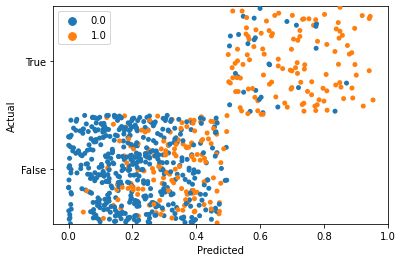

In [44]:
import seaborn as sns

ax = sns.stripplot(x=predictions.reshape(-1), y=rounded.reshape(-1), hue=y.reshape(-1), jitter=0.5)
ax.set(xlabel="Predicted", ylabel = "Actual")

## Summary print

In [22]:
# summarize the first 5 cases
for i in range(5):
    print(f'{str(X[i].tolist()):50} => {predictions[i]} (expected {y[i]})')

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]   => [0.7674482] (expected 1.0)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]    => [0.1374856] (expected 0.0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0]    => [0.7971709] (expected 1.0)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0]   => [0.1164844] (expected 0.0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => [0.7162262] (expected 1.0)
